In [3]:
# Import necessary packages
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
import os


In [6]:
# Initialize components
def create_search_agent():
    # Create memory for persistence
    memory = MemorySaver()
    
    # Initialize the Groq model
    model = ChatGroq(
        model_name="mixtral-8x7b-32768",
        temperature=0.1,
        max_tokens=4096
    )
    
    # Set up the search tool
    search = TavilySearchResults(max_results=2)
    tools = [search]
    
    # Create the agent
    agent_executor = create_react_agent(
        model, 
        tools, 
        checkpointer=memory
    )
    
    return agent_executor

In [9]:
def run_agent():
    # Create the agent
    agent = create_search_agent()
    
    # Configure thread for conversation memory
    config = {"configurable": {"thread_id": "conversation_1"}}
    
    # Example interaction
    messages = [
        HumanMessage(content="he my name is prashant")
    ]
    
    # Stream the response
    for chunk in agent.stream({"messages": messages}, config):
        print(chunk)
        print("----")

run_agent()

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_517f', 'function': {'arguments': '{"query":"who am I"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 1210, 'total_tokens': 1307, 'completion_time': 0.148998504, 'prompt_time': 0.198446273, 'queue_time': 0.085954156, 'total_time': 0.347444777}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-fd6901bb-e15e-431f-8135-d927f1eff7fd-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'who am I'}, 'id': 'call_517f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1210, 'output_tokens': 97, 'total_tokens': 1307})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://destinysodyssey.com/personal-development/self-discovery/personal-identity/", "content": "Your PI is all those pieces 

In [10]:
def run_agent():
    # Create the agent
    agent = create_search_agent()
    
    # Configure thread for conversation memory
    config = {"configurable": {"thread_id": "conversation_2"}}
    
    # Example interaction
    messages = [
        HumanMessage(content="he my name is prashant")
    ]
    
    # Stream the response
    for chunk in agent.stream({"messages": messages}, config):
        print(chunk)
        print("----")

run_agent()

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zpn5', 'function': {'arguments': '{"query":"Prashant\'s name meaning"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 1213, 'total_tokens': 1314, 'completion_time': 0.154673505, 'prompt_time': 0.058081066, 'queue_time': 0.019558015999999998, 'total_time': 0.212754571}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0ba879d5-336d-4b35-b712-2963b146d912-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "Prashant's name meaning"}, 'id': 'call_zpn5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1213, 'output_tokens': 101, 'total_tokens': 1314})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://www.onlymyhealth.com/baby-names/meaning-of-name-prashant-1427780106", "cont

In [11]:
def run_agent():
    # Create the agent
    agent = create_search_agent()
    
    # Configure thread for conversation memory
    config = {"configurable": {"thread_id": "conversation_2"}}
    
    # Example interaction
    messages = [
        HumanMessage(content="what is my name?")
    ]
    
    # Stream the response
    for chunk in agent.stream({"messages": messages}, config):
        print(chunk)
        print("----")

run_agent()

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w16y', 'function': {'arguments': '{"query":"who am I"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 1211, 'total_tokens': 1308, 'completion_time': 0.148958718, 'prompt_time': 0.051587285, 'queue_time': 0.019967897, 'total_time': 0.200546003}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-79f272ab-fad0-42ce-883c-0ff74065055b-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'who am I'}, 'id': 'call_w16y', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1211, 'output_tokens': 97, 'total_tokens': 1308})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://hackspirit.com/who-am-i-answers-examples/", "content": "More From: Mindful Living\\nIf you want to excel in life, say

In [12]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()



In [13]:
memory

In [22]:
model = ChatGroq(
    model_name="mixtral-8x7b-32768",
    temperature=0.1,
    max_tokens=4096
)
from langchain_core.tools import tool


@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b




from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2)
tools = [search, multiply]




In [23]:
agent_executor = create_react_agent(model, tools, checkpointer=memory)


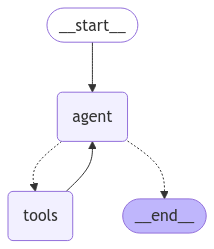

In [24]:
agent_executor

In [25]:
config = {"configurable": {"thread_id": "1"}}

for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="what is 2*4!")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7drz', 'function': {'arguments': '{"a":2,"b":4}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 1396, 'total_tokens': 1493, 'completion_time': 0.148315756, 'prompt_time': 0.097090138, 'queue_time': 0.019203849999999995, 'total_time': 0.245405894}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-629fa3df-72ba-4b22-a643-17ab4219e9ce-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 4}, 'id': 'call_7drz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1396, 'output_tokens': 97, 'total_tokens': 1493})]}}
----
{'tools': {'messages': [ToolMessage(content='8', name='multiply', id='1f838a56-8a39-4484-aa2b-aa4a9385f2e1', tool_call_id='call_7drz')]}}
----
{'agent': {'messages': [AIMessage(content='The product of 2 and 4 is 8.', ad

In [26]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats my name?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content="I'm an AI language model, so I don't have a name in the human sense. I'm here to help answer your questions to the best of my ability.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 1498, 'total_tokens': 1536, 'completion_time': 0.057472283, 'prompt_time': 0.063895417, 'queue_time': 0.016816934000000006, 'total_time': 0.1213677}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-05bb63e8-f2e1-49cb-80f8-60e2ecd3c84c-0', usage_metadata={'input_tokens': 1498, 'output_tokens': 38, 'total_tokens': 1536})]}}
----


In [21]:
from langchain_core.tools import tool


@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


# Let's inspect some of the attributes associated with the tool.
print(multiply.name)
print(multiply.description)
print(multiply.args)




multiply
Multiply two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}
